# Prediction of heart disease analysis using Logistic regression

### About Dataset
Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Content
Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Datasets\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Plotting and visualization

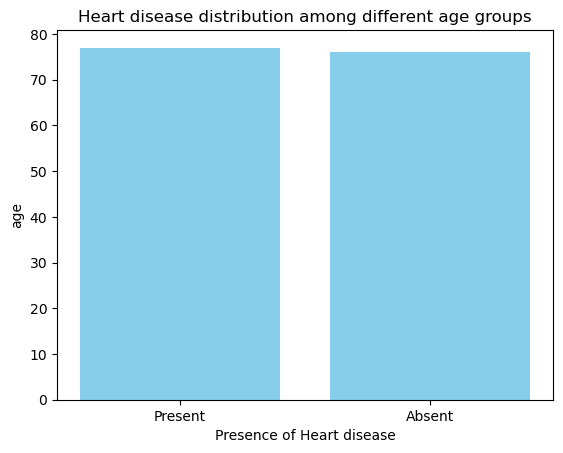

In [7]:
fig, ax = plt.subplots()
ax.bar(df['Heart disease'],df['age'], color="skyblue")
ax.set(title="Heart disease distribution among different age groups",xlabel='Presence of Heart disease',ylabel='age')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


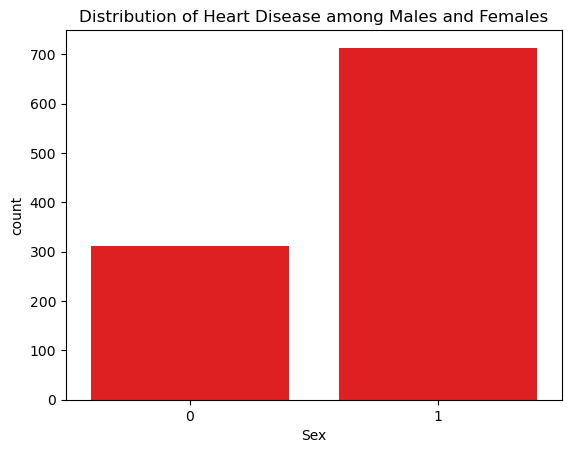

In [9]:
# Column visualisation with seaborn
fig,ax=plt.subplots()
sns.countplot(x='sex',data=df, color="red")
ax.set(title='Distribution of Heart Disease among Males and Females',xlabel='Sex', ylabel="count")
plt.show()

# Data Preprocesing

In [5]:
# Preprocessing
#fix x and y variables
x=df.iloc[:,0:13]
y=df.iloc[:,-1]

In [6]:
#standardize values
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)


In [7]:
range_Old=max(df['oldpeak'])-min(df['oldpeak'])
range_Old

6.2

# Splitting the training and testing dataset

In [8]:
#split the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# Fitting the Logistic regression model

In [9]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x,y)

LogisticRegression()

In [10]:
logreg.coef_

array([[-0.07679312, -0.83306048,  0.86558078, -0.31260483, -0.28414551,
        -0.03448577,  0.21479859,  0.5340554 , -0.46516151, -0.66038337,
         0.3266643 , -0.76547604, -0.54327184]])

In [11]:
logreg.intercept_

array([-0.13148683])

In [12]:
y_pred=logreg.predict(x_test)

In [13]:
pd.DataFrame({"Actual Value":y_test,"Predicted value " :y_pred})

,Actual Value,Predicted value
807,1,1
27,0,1
77,0,0
406,1,1
886,0,0
...,...,...
877,1,1
320,1,1
362,1,1
452,0,0


# Model Evaluation

In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[ 77  21]
 [  6 101]]


In [15]:
from sklearn.metrics import classification_report
class_rep=classification_report(y_test,y_pred)
print('Classification Report', class_rep)

Classification Report               precision    recall  f1-score   support

           0       0.93      0.79      0.85        98
           1       0.83      0.94      0.88       107

    accuracy                           0.87       205
   macro avg       0.88      0.86      0.87       205
weighted avg       0.88      0.87      0.87       205



###  From the classification report, we can see that the fitted model gives an accuracy of 87 percent, i.e the fitted logistic model for heart disease prediction is good.